In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Scrapping data from website

In [2]:
url = 'https://speedwayekstraliga.pl/statystyki/lista-klasyfikacyjna/?k=2&y='

In [3]:
years = np.arange(2022,2006,-1)

In [4]:
years

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007])

In [5]:
for year in years:
    r = requests.get(url+str(year))
    r.status_code
    tab = pd.read_html(r.text)
    tab[0].insert(tab[0].columns.get_loc("Zawodnik"),'Sezon', year)
    if year == max(years):
        df = tab[0]
    else:
        df = pd.concat([df,tab[0]])

In [6]:
df

,#,Sezon,Zawodnik,Drużyna,Kls,Me,Pkt,Bon,Sum,St,...,II,III,IV,D,T,M,W,U,Ż,C
0,1.0,2022,Zmarzlik Bartosz,GOR,Tak,20,278,6,284,106,...,23,7,1,0,0,0,0,0,0,0
1,2.0,2022,Pedersen Nicki,GRU,Tak,6,67,4,71,29,...,7,5,0,0,0,0,1,0,0,0
2,3.0,2022,Kołodziej Janusz,LES,Tak,15,173,9,182,75,...,24,8,3,0,0,0,1,0,0,0
3,4.0,2022,Madsen Leon,CZE,Tak,20,221,11,232,102,...,31,18,6,0,0,0,0,0,0,0
4,5.0,2022,Vaculik Martin,GOR,Tak,19,190,12,202,89,...,30,10,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85.0,2007,Celmer Damian,TOR,Nie,1,0,0,0,3,...,0,0,3,0,0,0,0,0,0,0
85,85.0,2007,Piekarski Marcin,CZE,Nie,1,0,0,0,3,...,0,0,3,0,0,0,0,0,0,0
86,87.0,2007,Johnston Steven,TOR,Nie,1,0,0,0,2,...,0,0,2,0,0,0,0,0,0,0
87,87.0,2007,Kiełbasa Szymon,TAR,Nie,1,0,0,0,2,...,0,0,2,0,0,0,0,0,0,0


In [7]:
df.Zawodnik.unique()

array(['Zmarzlik Bartosz', 'Pedersen Nicki', 'Kołodziej Janusz',
       'Madsen Leon', 'Vaculik Martin', 'Michelsen Mikkel',
       'Janowski Maciej', 'Kubera Dominik', 'Lambert Robert',
       'Thomsen Anders', 'Woryna Kacper', 'Dudek Patryk', 'Holder Chris',
       'Lindgren Fredrik', 'Doyle Jason', 'Woffinden Tai',
       'Hampel Jarosław', 'Miśkowiak Jakub', 'Woźniak Szymon',
       'Bewley Daniel', 'Pawlicki Piotr', 'Drabik Maksym',
       'Przedpełski Paweł', 'Kasprzak Krzysztof', 'Smektała Bartosz',
       'Lidsey Jaimon', 'Jakobsen  Frederik', 'Holder Jack',
       'Pawlicki Przemysław', 'Lampart Wiktor', 'Krakowiak Norbert',
       'Cierniak Mateusz', 'Tudzież Mateusz', 'Walasek Grzegorz',
       'Bellego David', 'Berntzon Oliver', 'Świdnicki Mateusz',
       'Kowalski Bartłomiej', 'Chugunov Gleb', 'Jeppesen Jonas',
       'Gapiński Tomasz', 'Pludra Kacper', 'Ratajczak Damian',
       'Hansen Patrick', 'Paluch Oskar', 'Jasiński Wiktor',
       'Nielsen Matias', 'Lewandowski Kr

# Checking double white spaces

In [8]:
df.Zawodnik[df.Zawodnik.str.contains('  ')]

26        Jakobsen  Frederik
39         Cierniak  Mateusz
39        Lindbaeck  Antonio
26             Holder  Chris
26    Jepsen Jensen  Michael
26               Holta  Rune
26         Musielak  Tobiasz
26           Batchelor  Troy
13           Bjerre  Kenneth
26            Woffinden  Tai
26           Nicholls  Scott
26          Davidsson  Jonas
Name: Zawodnik, dtype: object

In [9]:
df.Zawodnik = df.Zawodnik.str.replace('  ', ' ')

In [10]:
df.Zawodnik.str.contains('  ').sum()

0

In [11]:
spaces = []
for i in df.Zawodnik.to_list():
    if i[-1] == ' ':
        spaces.append[i]

In [12]:
spaces

[]

In [13]:
years2 = np.arange(2022,2013,-1)

In [14]:
years2

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

# Scrapping data for Points per match and Points per heat

In [15]:
url2 = 'https://sportowefakty.wp.pl/zuzel/pge-ekstraliga/statystyki/'

In [16]:
for year in years2:
    r = requests.get(url2+str(year)+'/pelne')
    r.status_code
    tab = pd.read_html(r.text)
    tab[0].insert(tab[0].columns.get_loc("Zawodnik"),"Sezon", year)
    if year == max(years2):
        df2 = tab[0]
    else:
        df2 = pd.concat([df2,tab[0]])

In [17]:
df2.head()

,Poz.,Sezon,Zawodnik,Klub,M,B,1,2,3,4,...,U,W,T,Pkt.,Bonus,Razem,Śr/bieg,Śr/mecz,Dom,Wyjazd
0,1.0,2022,Bartosz Zmarzlik,ebut.pl Stal Gorzów,20,106,75,23,7,1,...,0,0,0,278,6,284,2679,1390,2731,2630
1,2.0,2022,Nicki Pedersen,ZOOleszcz GKM Grudziądz,6,29,16,7,5,0,...,0,1,0,67,4,71,2448,1340,2500,2364
2,3.0,2022,Janusz Kołodziej,Fogo Unia Leszno,15,75,39,24,8,3,...,0,1,0,173,9,182,2427,1153,2415,2441
3,4.0,2022,Leon Madsen,Włókniarz Częstochowa,20,102,47,31,18,6,...,0,0,0,221,11,232,2275,1105,2519,2020
4,5.0,2022,Martin Vaculik,ebut.pl Stal Gorzów,19,89,40,30,10,9,...,0,0,0,190,12,202,2270,1056,2340,2191


# Changing df2 Zawodnik to Last Name, First Name format

In [18]:
df2.Zawodnik.str.contains('  ').sum()

0

In [19]:
df2.Zawodnik = df2.Zawodnik.str.split(' ').str.get(1) + ' ' + df2.Zawodnik.str.split(' ').str.get(0)

In [20]:
df2.sample(5)

,Poz.,Sezon,Zawodnik,Klub,M,B,1,2,3,4,...,U,W,T,Pkt.,Bonus,Razem,Śr/bieg,Śr/mecz,Dom,Wyjazd
46,47.0,2014,Jabłoński Mirosław,Włókniarz Częstochowa,11,52,5,12,19,10,...,1,2,1,58,5,63,1212,527,1200,1222
21,22.0,2020,Lambert Robert,ROW Rybnik,14,80,24,28,14,11,...,0,2,0,142,5,147,1838,1014,1848,1824
48,49.0,2019,Karczmarz Rafał,ebut.pl Stal Gorzów,14,61,10,8,12,30,...,1,0,0,58,7,65,1066,414,1400,742
48,49.0,2015,Czaja Artur,Stal Rzeszów,14,53,6,11,15,18,...,2,1,0,55,6,61,1151,393,1333,1000
21,22.0,2021,Kubera Dominik,Motor Lublin,17,83,15,23,23,10,...,0,2,0,131,18,149,1795,771,2089,1447


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 55
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Poz.      482 non-null    float64
 1   Sezon     482 non-null    int32  
 2   Zawodnik  482 non-null    object 
 3   Klub      482 non-null    object 
 4   M         482 non-null    int64  
 5   B         482 non-null    int64  
 6   1         482 non-null    int64  
 7   2         482 non-null    int64  
 8   3         482 non-null    int64  
 9   4         482 non-null    int64  
 10  D         482 non-null    int64  
 11  U         482 non-null    int64  
 12  W         482 non-null    int64  
 13  T         482 non-null    int64  
 14  Pkt.      482 non-null    int64  
 15  Bonus     482 non-null    int64  
 16  Razem     482 non-null    int64  
 17  Śr/bieg   482 non-null    int64  
 18  Śr/mecz   482 non-null    int64  
 19  Dom       482 non-null    int64  
 20  Wyjazd    482 non-null    int64  

# Converting to original decimal format

In [22]:
df2.iloc[:,17:21] = df2.iloc[:,17:21].astype(float)

In [23]:
df2.iloc[:,[17,19,20]] = df2.iloc[:,[17,19,20]]/1000

In [24]:
df2.iloc[:,18] = df2.iloc[:,18]/100

In [25]:
df2.sample(5)

,Poz.,Sezon,Zawodnik,Klub,M,B,1,2,3,4,...,U,W,T,Pkt.,Bonus,Razem,Śr/bieg,Śr/mecz,Dom,Wyjazd
3,4.0,2021,Doyle Jason,Fogo Unia Leszno,18,95,36,28,16,5,...,0,1,0,197,17,214,2.253,10.94,2.250,2.255
26,27.0,2022,Jakobsen Frederik,ZOOleszcz GKM Grudziądz,14,73,11,21,26,14,...,0,1,0,101,17,118,1.616,7.21,1.829,1.421
20,21.0,2016,Zengota Grzegorz,Fogo Unia Leszno,14,72,14,28,20,8,...,1,1,0,118,14,132,1.833,8.43,1.912,1.763
43,44.0,2020,Tonder Mateusz,Stelmet Falubaz Zielona Góra,17,44,6,4,19,14,...,1,0,0,45,7,52,1.182,3.00,1.304,1.048
31,32.0,2019,Kubera Dominik,Fogo Unia Leszno,18,73,15,16,21,20,...,0,1,0,98,14,112,1.534,5.44,1.333,1.730


# Merging df and df2

In [26]:
pge_riders = pd.merge(df,df2.loc[:,['Sezon', 'Zawodnik','Śr/mecz','Dom','Wyjazd']], on=['Zawodnik','Sezon'], how='left')

In [27]:
pge_riders.head()

,#,Sezon,Zawodnik,Drużyna,Kls,Me,Pkt,Bon,Sum,St,...,D,T,M,W,U,Ż,C,Śr/mecz,Dom,Wyjazd
0,1.0,2022,Zmarzlik Bartosz,GOR,Tak,20,278,6,284,106,...,0,0,0,0,0,0,0,13.90,2.731,2.630
1,2.0,2022,Pedersen Nicki,GRU,Tak,6,67,4,71,29,...,0,0,0,1,0,0,0,13.40,2.500,2.364
2,3.0,2022,Kołodziej Janusz,LES,Tak,15,173,9,182,75,...,0,0,0,1,0,0,0,11.53,2.415,2.441
3,4.0,2022,Madsen Leon,CZE,Tak,20,221,11,232,102,...,0,0,0,0,0,0,0,11.05,2.519,2.020
4,5.0,2022,Vaculik Martin,GOR,Tak,19,190,12,202,89,...,0,0,0,0,0,0,0,10.56,2.340,2.191


# Importing riders birthdate database

In [28]:
riders_bd = pd.read_csv('riders_birthdt.csv')

In [29]:
riders_bd.head()

,Zawodnik,Data urodzenia,Rocznik,Narodowość
0,Aagaard Nicklas,2006-07-19,2006,Dania
1,Aarnio Tero,1984-04-17,1984,Finlandia
2,Abakumow Sławomir,1969-10-20,1969,Polska
3,Adam Paweł,1944-01-03,1944,Polska
4,Adamczak Damian,1991-09-07,1991,Polska


In [30]:
riders_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zawodnik        2520 non-null   object
 1   Data urodzenia  2520 non-null   object
 2   Rocznik         2520 non-null   int64 
 3   Narodowość      2520 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.9+ KB


In [31]:
riders_bd.Zawodnik.str.contains('  ').sum()

0

In [32]:
pge_riders = pd.merge(pge_riders,riders_bd.loc[:,['Zawodnik','Rocznik','Narodowość']], on='Zawodnik',how='left')

In [33]:
pge_riders.sample(5)

,#,Sezon,Zawodnik,Drużyna,Kls,Me,Pkt,Bon,Sum,St,...,M,W,U,Ż,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość
144,72.0,2021,Karion Mark,LUB,Nie,17,0,0,0,1,...,0,1,0,0,0,NaN,NaN,NaN,2000.0,Rosja
735,61.0,2013,Andersson Dennis,RZE,Nie,4,14,5,19,16,...,0,0,0,0,0,NaN,NaN,NaN,1991.0,Szwecja
76,4.0,2021,Doyle Jason,LES,Tak,18,197,17,214,95,...,0,1,0,0,0,10.94,2.25,2.255,1985.0,Australia
489,47.0,2016,Rempała Krystian,TAR,Nie,4,18,3,21,18,...,0,0,0,0,0,NaN,NaN,NaN,1998.0,Polska
941,64.0,2011,Kostro Tadeusz,TAR,Tak,15,25,4,29,43,...,1,1,0,0,0,NaN,NaN,NaN,1991.0,Polska


In [34]:
#selecting only classified riders

In [35]:
pge_riders = pge_riders[pge_riders.Kls == 'Tak']

In [36]:
pge_riders = pge_riders.rename(columns={'#':"Pozycja"})

In [37]:
pge_riders.head()

,Pozycja,Sezon,Zawodnik,Drużyna,Kls,Me,Pkt,Bon,Sum,St,...,M,W,U,Ż,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość
0,1.0,2022,Zmarzlik Bartosz,GOR,Tak,20,278,6,284,106,...,0,0,0,0,0,13.90,2.731,2.630,1995.0,Polska
1,2.0,2022,Pedersen Nicki,GRU,Tak,6,67,4,71,29,...,0,1,0,0,0,13.40,2.500,2.364,1977.0,Dania
2,3.0,2022,Kołodziej Janusz,LES,Tak,15,173,9,182,75,...,0,1,0,0,0,11.53,2.415,2.441,1984.0,Polska
3,4.0,2022,Madsen Leon,CZE,Tak,20,221,11,232,102,...,0,0,0,0,0,11.05,2.519,2.020,1988.0,Dania
4,5.0,2022,Vaculik Martin,GOR,Tak,19,190,12,202,89,...,0,0,0,0,0,10.56,2.340,2.191,1990.0,Słowacja


# Checking nan values in Rocznik column

In [38]:
missing_riders = pge_riders.Zawodnik[pge_riders.Rocznik.isnull()].unique()

In [39]:
s_missing = pd.Series(missing_riders)

In [40]:
s_missing

0              Bewley Daniel
1           Sajfutdinow Emil
2            Laguta Grigorij
3                Zagar Matej
4      Jepsen Jensen Michael
5            Logachev Sergei
6          Lindbaeck Antonio
7               Milik Vaclav
8            Trofymov Viktor
9     Iversen Niels Kristian
10          Sundstroem Linus
11           Lebedevs Andzej
12             Karpov Andriy
13         Loktaev Oleksandr
14         Jonasson Tomas H.
15             Pavlic Jurica
16          Andersen Hans N.
17                Watt David
18         Kylmakorpi Joonas
19         Monberg Jesper B.
20       Zetterstroem Magnus
21                 Kus Matej
22              Sitera Filip
23               Dryml Lukas
dtype: object

In [41]:
# import missing data

In [42]:
s_riders_bd_na = pd.read_csv('riders_bd_na.csv', index_col=0).squeeze(axis=1)

In [43]:
s_riders_bd_na.head()

Bewley Daniel          1999
Jakobsen  Frederik     1998
Sorensen Tim           2000
Breum Ankersen Emil    2002
Sajfutdinow Emil       1989
Name: 0, dtype: int64

In [44]:
s_riders_bd_na.index.str.contains('  ').sum()

12

In [45]:
s_bd_index = s_riders_bd_na.index

In [46]:
s_bd_index = s_bd_index.str.replace('  ', ' ')

In [47]:
s_riders_bd_na.index = s_bd_index

In [48]:
s_riders_bd_na.index.str.contains('  ').sum()

0

In [49]:
s_riders_bd_na = s_riders_bd_na[~s_riders_bd_na.index.duplicated(keep='first')]

In [50]:
s_riders_nat_na = pd.read_csv('riders_nat_na.csv', index_col=0).squeeze(axis=1)

In [51]:
s_riders_nat_na.head()

Bewley Daniel          Wielka Brytania
Jakobsen  Frederik               Dania
Sorensen Tim                     Dania
Breum Ankersen Emil              Dania
Sajfutdinow Emil                 Rosja
Name: 0, dtype: object

In [52]:
s_riders_nat_na.index.str.contains('  ').sum()

12

In [53]:
s_riders_nat_na.index = s_bd_index

In [54]:
s_riders_nat_na.index.str.contains('  ').sum()

0

In [55]:
s_riders_nat_na = s_riders_nat_na[~s_riders_nat_na.index.duplicated(keep='first')]

In [56]:
pge_riders['Rocznik'] = pge_riders['Rocznik'].fillna(pge_riders['Zawodnik'].map(s_riders_bd_na))

In [57]:
pge_riders['Rocznik'].isnull().sum()

0

In [58]:
pge_riders['Narodowość'] = pge_riders['Narodowość'].fillna(pge_riders['Zawodnik'].map(s_riders_nat_na))

In [59]:
pge_riders['Narodowość'].isna().sum()

0

In [60]:
pge_riders['Rocznik'] = pge_riders['Rocznik'].astype('int')

In [62]:
pge_riders.insert(pge_riders.columns.get_loc("Drużyna"),"Wiek",pge_riders.Sezon - pge_riders.Rocznik)

In [63]:
pge_riders.head()

,Pozycja,Sezon,Zawodnik,Wiek,Drużyna,Kls,Me,Pkt,Bon,Sum,...,M,W,U,Ż,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość
0,1.0,2022,Zmarzlik Bartosz,27,GOR,Tak,20,278,6,284,...,0,0,0,0,0,13.90,2.731,2.630,1995,Polska
1,2.0,2022,Pedersen Nicki,45,GRU,Tak,6,67,4,71,...,0,1,0,0,0,13.40,2.500,2.364,1977,Dania
2,3.0,2022,Kołodziej Janusz,38,LES,Tak,15,173,9,182,...,0,1,0,0,0,11.53,2.415,2.441,1984,Polska
3,4.0,2022,Madsen Leon,34,CZE,Tak,20,221,11,232,...,0,0,0,0,0,11.05,2.519,2.020,1988,Dania
4,5.0,2022,Vaculik Martin,32,GOR,Tak,19,190,12,202,...,0,0,0,0,0,10.56,2.340,2.191,1990,Słowacja


In [64]:
pge_riders['Sezon_Flag'] = 1

In [65]:
pge_riders.sample(3)

,Pozycja,Sezon,Zawodnik,Wiek,Drużyna,Kls,Me,Pkt,Bon,Sum,...,W,U,Ż,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość,Sezon_Flag
93,21.0,2021,Woźniak Szymon,28,GOR,Tak,16,122,20,142,...,1,0,0,0,7.63,1.800,1.795,1993,Polska,1
155,11.0,2020,Pedersen Nicki,43,GRU,Tak,14,138,6,144,...,0,0,1,0,9.86,2.441,1.694,1977,Dania,1
619,26.0,2014,Przedpełski Paweł,18,TOR,Tak,14,90,11,101,...,1,0,0,0,6.43,2.148,1.433,1996,Polska,1


In [66]:
riders_seasons = pge_riders.loc[:,['Sezon','Zawodnik','Sezon_Flag']].sort_values(by=['Zawodnik','Sezon'])

In [67]:
riders_seasons

,Sezon,Zawodnik,Sezon_Flag
845,2012,Adamczewski Kamil,1
756,2013,Adamczewski Kamil,1
642,2014,Adamczewski Kamil,1
1206,2007,Adams Leigh,1
1120,2008,Adams Leigh,1
...,...,...,...
501,2016,Świderski Piotr,1
194,2020,Świdnicki Mateusz,1
97,2021,Świdnicki Mateusz,1
36,2022,Świdnicki Mateusz,1


In [68]:
riders_seasons.groupby(['Zawodnik'])['Sezon_Flag'].cumsum()

845     1
756     2
642     3
1206    1
1120    2
       ..
501     6
194     1
97      2
36      3
134     1
Name: Sezon_Flag, Length: 879, dtype: int64

In [69]:
pge_riders['Doświadczenie'] = riders_seasons.groupby(['Zawodnik'])['Sezon_Flag'].cumsum()

In [70]:
pge_riders.loc[:,['Zawodnik','Sezon','Doświadczenie']]

,Zawodnik,Sezon,Doświadczenie
0,Zmarzlik Bartosz,2022,12
1,Pedersen Nicki,2022,15
2,Kołodziej Janusz,2022,15
3,Madsen Leon,2022,12
4,Vaculik Martin,2022,15
...,...,...,...
1267,Świderski Piotr,2007,1
1269,Miesiąc Paweł,2007,1
1273,Zieliński Kamil,2007,1
1275,Kasprzak Robert,2007,1


In [71]:
riders_teams = pge_riders.loc[:,['Zawodnik','Sezon','Drużyna']].sort_values(by=['Zawodnik','Sezon'])

In [72]:
riders_teams.reset_index(drop=True, inplace=True)

In [73]:
riders_teams.head()

,Zawodnik,Sezon,Drużyna
0,Adamczewski Kamil,2012,LES
1,Adamczewski Kamil,2013,ZIE
2,Adamczewski Kamil,2014,ZIE
3,Adams Leigh,2007,LES
4,Adams Leigh,2008,LES


In [74]:
riders_teams['Transfer'] = np.where((riders_teams.Drużyna.shift(1) == riders_teams.Drużyna) |
                                        (riders_teams.Zawodnik.shift(1) != riders_teams.Zawodnik),
                                        0,1)

In [75]:
riders_teams.head(20)

,Zawodnik,Sezon,Drużyna,Transfer
0,Adamczewski Kamil,2012,LES,0
1,Adamczewski Kamil,2013,ZIE,1
2,Adamczewski Kamil,2014,ZIE,0
3,Adams Leigh,2007,LES,0
4,Adams Leigh,2008,LES,0
5,Adams Leigh,2009,LES,0
6,Adams Leigh,2010,LES,0
7,Andersen Hans N.,2007,WRO,0
8,Andersen Hans N.,2008,TOR,1
9,Andersen Hans N.,2009,GDA,1


In [76]:
riders_teams.groupby('Zawodnik')[['Transfer']].sum().sort_values(by='Transfer', ascending=False)

,Transfer
Zawodnik,
Holta Rune,9
Pedersen Nicki,8
Bjerre Kenneth,7
Zagar Matej,7
Walasek Grzegorz,7
...,...
Kowalski Bartłomiej,0
Koza Ernest,0
Kościuch Norbert,0


In [77]:
riders_teams['Transfer_cum'] = riders_teams.groupby(['Zawodnik'])['Transfer'].cumsum()

In [78]:
riders_teams[riders_teams.Zawodnik == 'Holta Rune']

,Zawodnik,Sezon,Drużyna,Transfer,Transfer_cum
244,Holta Rune,2007,TAR,0,0
245,Holta Rune,2008,GOR,1,1
246,Holta Rune,2009,GOR,0,1
247,Holta Rune,2010,CZE,1,2
248,Holta Rune,2011,TOR,1,3
249,Holta Rune,2012,ZIE,1,4
250,Holta Rune,2013,CZE,1,5
251,Holta Rune,2014,CZE,0,5
252,Holta Rune,2016,RYB,1,6
253,Holta Rune,2017,CZE,1,7


In [79]:
riders_teams.rename(columns={'Transfer_cum':'Liczba Transferów'}, inplace=True)

In [80]:
riders_teams.sample(3)

,Zawodnik,Sezon,Drużyna,Transfer,Liczba Transferów
489,Lisiecki Wojciech,2013,GNI,0,0
203,Hampel Jarosław,2014,ZIE,0,1
118,Dobrucki Rafał,2010,ZIE,0,1


In [81]:
riders_seasons

,Sezon,Zawodnik,Sezon_Flag
845,2012,Adamczewski Kamil,1
756,2013,Adamczewski Kamil,1
642,2014,Adamczewski Kamil,1
1206,2007,Adams Leigh,1
1120,2008,Adams Leigh,1
...,...,...,...
501,2016,Świderski Piotr,1
194,2020,Świdnicki Mateusz,1
97,2021,Świdnicki Mateusz,1
36,2022,Świdnicki Mateusz,1


In [82]:
pge_riders = pd.merge(pge_riders,riders_teams.loc[:,['Zawodnik', 'Sezon','Transfer','Liczba Transferów']], how='left', on=['Zawodnik', 'Sezon'])

In [83]:
pge_riders.sample(5)

,Pozycja,Sezon,Zawodnik,Wiek,Drużyna,Kls,Me,Pkt,Bon,Sum,...,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość,Sezon_Flag,Doświadczenie,Transfer,Liczba Transferów
133,33.0,2020,Fricke Max,24,WRO,Tak,18,99,16,115,...,0,5.50,1.541,1.568,1996,Australia,1,5,0,1
784,48.0,2009,Watt David,31,WRO,Tak,16,80,6,86,...,0,NaN,NaN,NaN,1978,Australia,1,3,1,1
40,43.0,2022,Ratajczak Damian,17,LES,Tak,13,47,4,51,...,0,3.62,1.292,0.952,2005,Polska,1,2,0,0
437,11.0,2014,Hampel Jarosław,32,ZIE,Tak,18,180,10,190,...,0,10.00,2.419,1.911,1982,Polska,1,8,0,1
464,38.0,2014,Holta Rune,41,CZE,Tak,11,71,12,83,...,0,6.45,1.633,1.546,1973,Norwegia,1,8,0,5


In [84]:
pge_riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pozycja            899 non-null    float64
 1   Sezon              899 non-null    int32  
 2   Zawodnik           899 non-null    object 
 3   Wiek               899 non-null    int32  
 4   Drużyna            899 non-null    object 
 5   Kls                899 non-null    object 
 6   Me                 899 non-null    int64  
 7   Pkt                899 non-null    int64  
 8   Bon                899 non-null    int64  
 9   Sum                899 non-null    int64  
 10  St                 899 non-null    int64  
 11  Średnia            899 non-null    float64
 12  I                  899 non-null    int64  
 13  II                 899 non-null    int64  
 14  III                899 non-null    int64  
 15  IV                 899 non-null    int64  
 16  D                  899 non

In [85]:
pge_riders.drop(columns='Sezon_Flag', inplace=True)

In [86]:
pge_riders.head()

,Pozycja,Sezon,Zawodnik,Wiek,Drużyna,Kls,Me,Pkt,Bon,Sum,...,Ż,C,Śr/mecz,Dom,Wyjazd,Rocznik,Narodowość,Doświadczenie,Transfer,Liczba Transferów
0,1.0,2022,Zmarzlik Bartosz,27,GOR,Tak,20,278,6,284,...,0,0,13.90,2.731,2.630,1995,Polska,12,0,0
1,2.0,2022,Pedersen Nicki,45,GRU,Tak,6,67,4,71,...,0,0,13.40,2.500,2.364,1977,Dania,15,0,8
2,3.0,2022,Kołodziej Janusz,38,LES,Tak,15,173,9,182,...,0,0,11.53,2.415,2.441,1984,Polska,15,0,3
3,4.0,2022,Madsen Leon,34,CZE,Tak,20,221,11,232,...,0,0,11.05,2.519,2.020,1988,Dania,12,0,4
4,5.0,2022,Vaculik Martin,32,GOR,Tak,19,190,12,202,...,0,0,10.56,2.340,2.191,1990,Słowacja,15,0,6


In [87]:
pge_riders.to_csv('pge_riders_to_stat_an.csv', index=False)

In [88]:
riders_wins = pge_riders.loc[:,['Sezon','Zawodnik','I','St','Doświadczenie']]

In [89]:
riders_wins['Pct Zwyciestw'] = np.round(riders_wins['I']/riders_wins['St'], decimals=2)

In [90]:
riders_wins.head()

,Sezon,Zawodnik,I,St,Doświadczenie,Pct Zwyciestw
0,2022,Zmarzlik Bartosz,75,106,12,0.71
1,2022,Pedersen Nicki,16,29,15,0.55
2,2022,Kołodziej Janusz,39,75,15,0.52
3,2022,Madsen Leon,47,102,12,0.46
4,2022,Vaculik Martin,40,89,15,0.45


In [91]:
riders_wins_22 = riders_wins[riders_wins.Sezon == 2022]

In [92]:
riders_wins_22.head()

,Sezon,Zawodnik,I,St,Doświadczenie,Pct Zwyciestw
0,2022,Zmarzlik Bartosz,75,106,12,0.71
1,2022,Pedersen Nicki,16,29,15,0.55
2,2022,Kołodziej Janusz,39,75,15,0.52
3,2022,Madsen Leon,47,102,12,0.46
4,2022,Vaculik Martin,40,89,15,0.45


In [376]:
riders_wins_22.loc[:,'Pct Zwyciestw'] = riders_wins_22['Pct Zwyciestw'].apply(lambda x: x/100)

C:\Users\PAWE~1\AppData\Local\Temp/ipykernel_31796/4142356250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riders_wins_22.loc[:,'Pct Zwyciestw'] = riders_wins_22['Pct Zwyciestw'].apply(lambda x: x/100)


In [377]:
riders_wins_22.head()

,Sezon,Zawodnik,I,St,Doświadczenie,Pct Zwyciestw
0,2022,Zmarzlik Bartosz,75,106,12,0.71
1,2022,Pedersen Nicki,16,29,15,0.55
2,2022,Kołodziej Janusz,39,75,15,0.52
3,2022,Madsen Leon,47,102,12,0.46
4,2022,Vaculik Martin,40,89,15,0.45


In [373]:
copy = riders_wins_22.style.format({'Pct Zwyciestw':'{:.0f}%'})

In [380]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter
from highlight_text import ax_text, fig_text

In [94]:
from PIL import Image
import urllib
import os

In [96]:
dos_mean = riders_wins_22.Doświadczenie.mean()

In [97]:
dos_mean

6.73469387755102

In [98]:
riders = np.array(riders_wins_22[riders_wins_22.Doświadczenie < dos_mean].nlargest(3,'Pct Zwyciestw')['Zawodnik'])

In [99]:
riders

array(['Michelsen Mikkel', 'Kubera Dominik', 'Miśkowiak Jakub'],
      dtype=object)

In [100]:
riders = np.append(riders,np.array(riders_wins_22[riders_wins_22.Doświadczenie < dos_mean].nsmallest(3,'Pct Zwyciestw')['Zawodnik']))

In [101]:
riders = np.append(riders,np.array(riders_wins_22[riders_wins_22.Doświadczenie > dos_mean].nlargest(3,'Pct Zwyciestw')['Zawodnik']))

In [102]:
riders = np.append(riders,np.array(riders_wins_22[riders_wins_22.Doświadczenie > dos_mean].nsmallest(3,'Pct Zwyciestw')['Zawodnik']))

In [103]:
riders

array(['Michelsen Mikkel', 'Kubera Dominik', 'Miśkowiak Jakub',
       'Nielsen Matias', 'Zieliński Denis', 'Curzytek Michał',
       'Zmarzlik Bartosz', 'Pedersen Nicki', 'Kołodziej Janusz',
       'Kasprzak Krzysztof', 'Gapiński Tomasz', 'Przedpełski Paweł'],
      dtype=object)

In [104]:
df_main = riders_wins_22[~riders_wins_22.Zawodnik.isin(riders)].reset_index(drop = True)
df_highlight = riders_wins_22[riders_wins_22.Zawodnik.isin(riders)].reset_index(drop = True)

In [105]:
df_main.head()

,Sezon,Zawodnik,I,St,Doświadczenie,Pct Zwyciestw
0,2022,Madsen Leon,47,102,12,0.46
1,2022,Vaculik Martin,40,89,15,0.45
2,2022,Janowski Maciej,43,101,15,0.43
3,2022,Lambert Robert,43,125,4,0.34
4,2022,Thomsen Anders,20,65,4,0.31


In [106]:
df_highlight

,Sezon,Zawodnik,I,St,Doświadczenie,Pct Zwyciestw
0,2022,Zmarzlik Bartosz,75,106,12,0.71
1,2022,Pedersen Nicki,16,29,15,0.55
2,2022,Kołodziej Janusz,39,75,15,0.52
3,2022,Michelsen Mikkel,54,105,5,0.51
4,2022,Kubera Dominik,42,107,6,0.39
5,2022,Miśkowiak Jakub,32,86,4,0.37
6,2022,Przedpełski Paweł,19,120,10,0.16
7,2022,Kasprzak Krzysztof,7,78,16,0.09
8,2022,Gapiński Tomasz,8,60,8,0.13
9,2022,Nielsen Matias,0,29,1,0.00


In [217]:
fm.findSystemFonts(fontpaths=None, fontext="ttf")

['C:\\Windows\\Fonts\\LBRITED.TTF',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\WINDOWS\\Fonts\\Candarab.ttf',
 'C:\\WINDOWS\\Fonts\\calibril.ttf',
 'C:\\WINDOWS\\Fonts\\georgiaz.ttf',
 'C:\\WINDOWS\\Fonts\\symbol.ttf',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\WINDOWS\\Fonts\\BOD_B.TTF',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\WINDOWS\\Fonts\\FRADM.TTF',
 'C:\\Windows\\Fonts\\MTCORSVA.TTF',
 'C:\\WINDOWS\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\holomdl2.ttf',
 'C:\\Windows\\Fonts\\CALISTBI.TTF',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\WINDOWS\\Fonts\\ARIALNI.TTF',
 'C:\\WINDOWS\\Fonts\\ROCKBI.TTF',
 'C:\\WINDOWS\\Fonts\\Sitka.ttc',
 'C:\\WINDOWS\\Fonts\\segoesc.ttf',
 'C:\\WINDOWS\\Fonts\\mingliub.ttc',
 'C:\\WINDOWS\\Fonts\\ENGR.TTF',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\WINDOWS\\Fonts\\corbelb

In [224]:
font_dirs = ['C:/Users/Paweł/AppData/Local/Microsoft/Windows/Fonts/Karla\-Regular.ttf']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# set font
#plt.rcParams['font.family'] = 'Comic Sans'

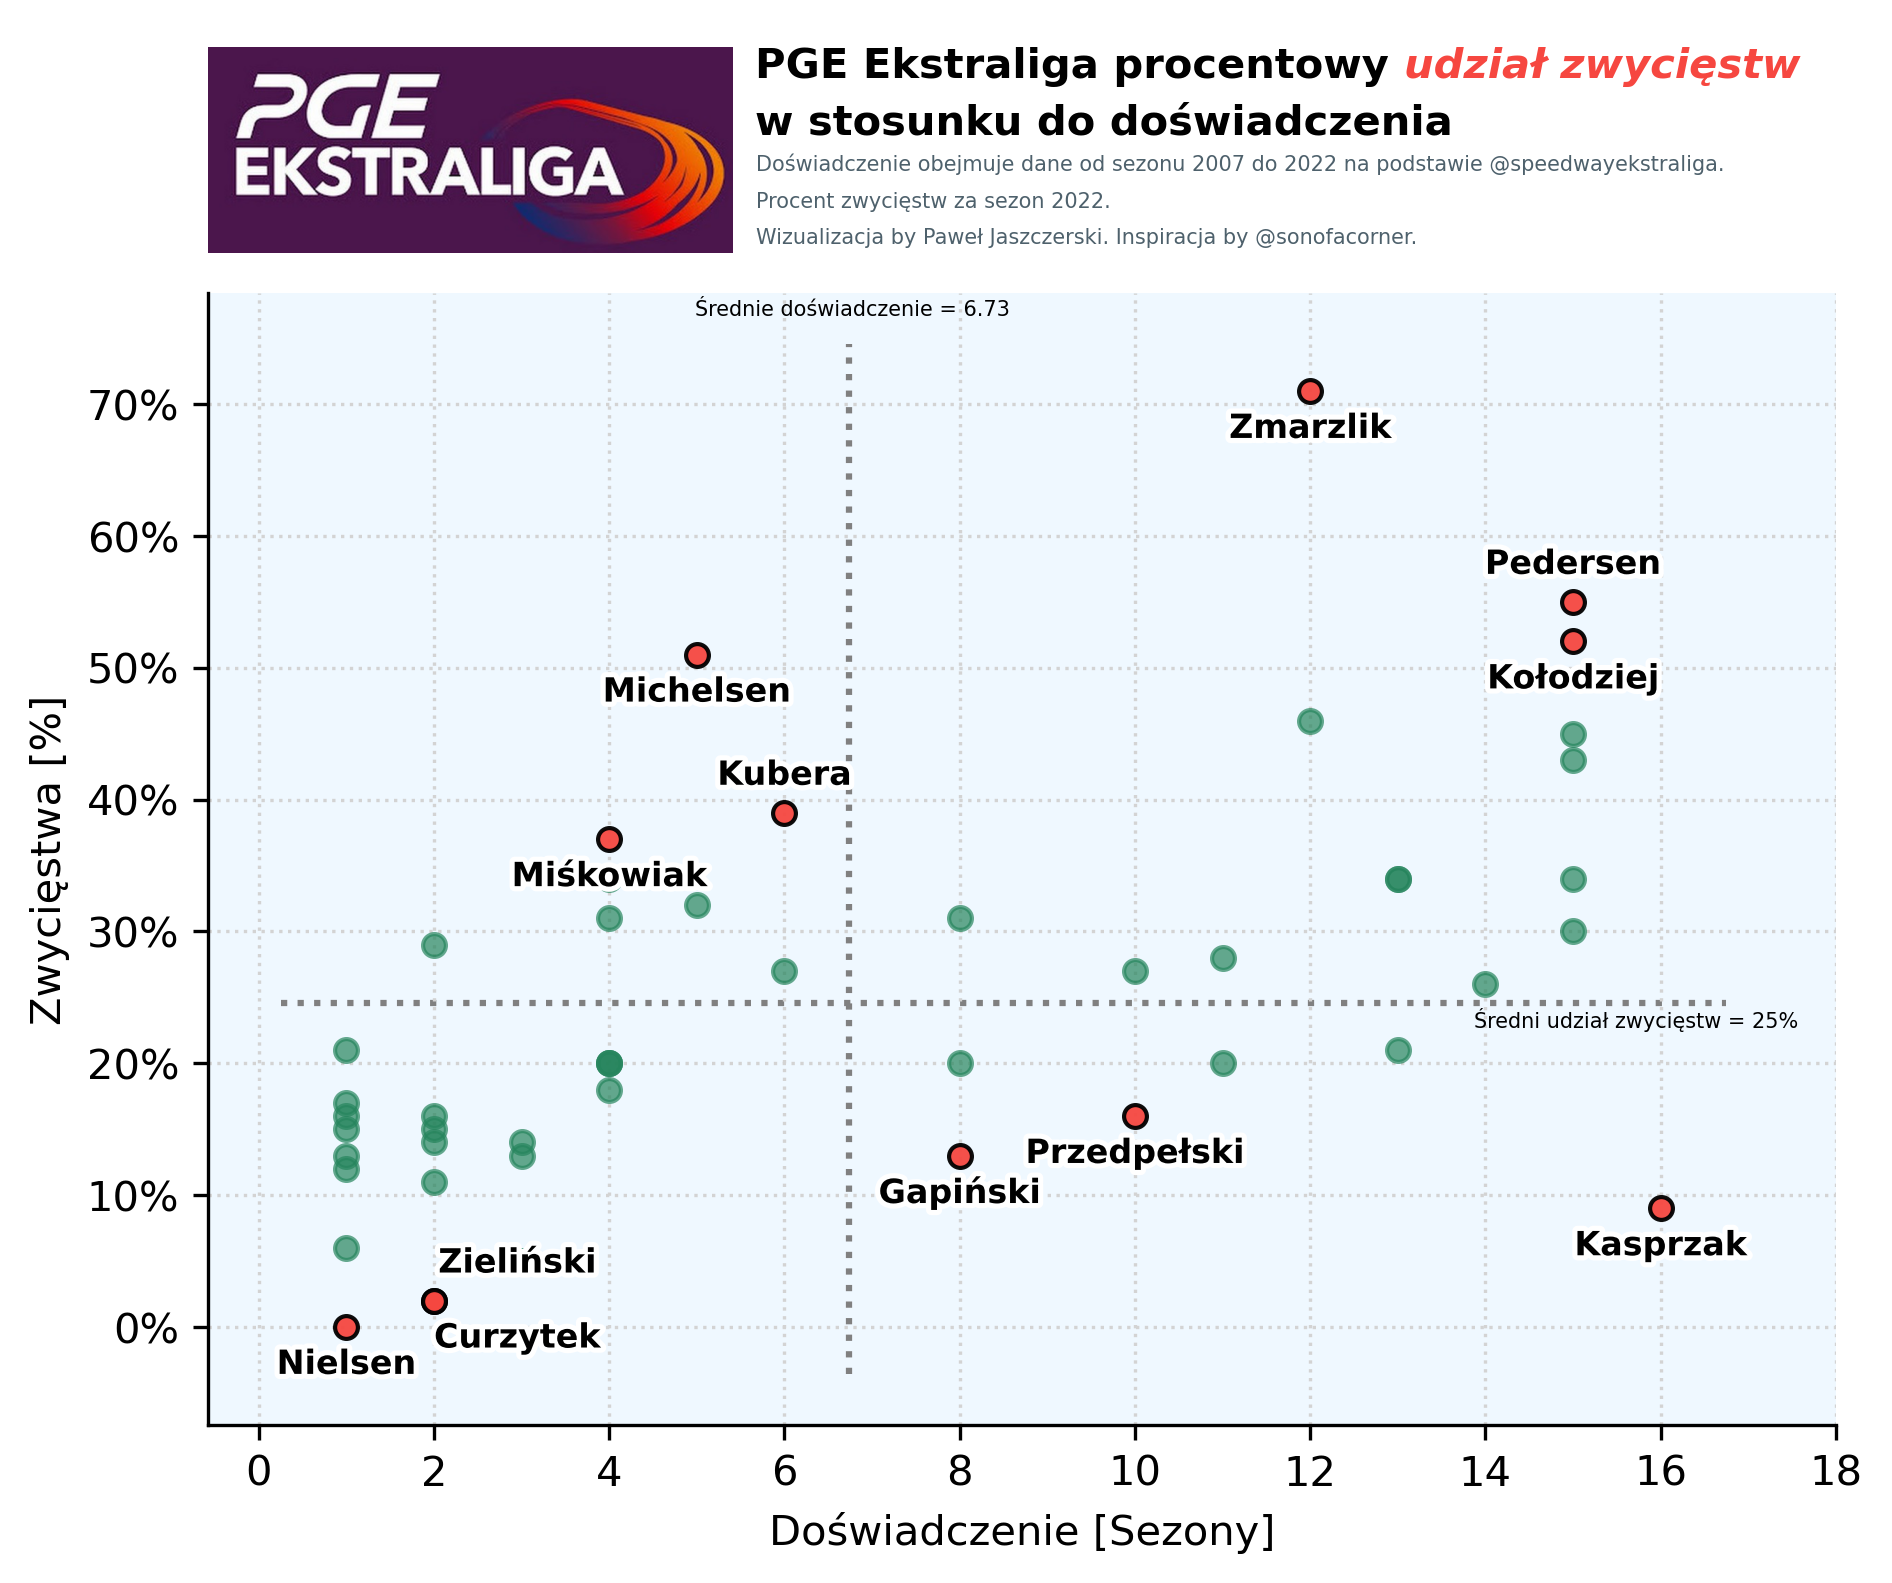

In [426]:
fig = plt.figure(figsize=(7,5), dpi=300)
ax = plt.subplot(facecolor= "#eff8ff")

##9b51e0
##EFE9E6

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

#plt.xticks(list(range(1,max(x)+1)),[str(i) for i in range(1,max(x)+1)])

ax.scatter(
    df_main.Doświadczenie,
    df_main['Pct Zwyciestw'],
    s = 30, 
    alpha = 0.7, 
    color = "#26855d",
    zorder = 2
)

ax.scatter(
    df_highlight.Doświadczenie,
    df_highlight['Pct Zwyciestw'],
    s = 30,
    alpha = 0.95,
    color = "#F64740",
    zorder = 3,
    ec = "#000000",

)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [riders_wins_22['Pct Zwyciestw'].mean(),riders_wins_22['Pct Zwyciestw'].mean()],
    ls = ":",
    color = 'gray',
    zorder = 1
)

ax.plot(
    [riders_wins_22.Doświadczenie.mean(),riders_wins_22.Doświadczenie.mean()],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    
    ls = ":",
    color = 'gray',
    zorder = 2
)

ax.grid(True, ls = ":", color = "lightgray")

for index, name in enumerate(df_highlight.Zawodnik):
    X = df_highlight.Doświadczenie.iloc[index]
    Y = df_highlight['Pct Zwyciestw'].iloc[index]
    if name in ['Zieliński Denis', 'Pedersen Nicki','Kubera Dominik']:
        y_pos = 9
    else:
        y_pos = -9
    if name in ['Curzytek Michał','Zieliński Denis']:
        x_pos = 20
    else:
        x_pos = 0
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(" ")[0],
        ha = "center",
        va = "center",
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        fontsize = 8,
        weight = "bold"
    )

    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                path_effects.Normal()]
            )
    
ax.set_xlabel("Doświadczenie [Sezony]")
ax.set_ylabel("Zwycięstwa [%]")

league_icon = Image.open("C:/Users/Paweł/Exercises/Power BI/PGE Ekstraliga/pge_ekstraliga logo.jpg")
league_ax = fig.add_axes([0.125, 0.85, 0.25, 0.25], zorder = 1)
league_ax.imshow(league_icon)
league_ax.axis("off")

"""fig_text(
    x = 0.73, y = 1.03, 
    s = "Who are the Premier League's\n<naughtiest> players?",
    highlight_textprops=[{"color":"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 12, color = "black", font = "Karla", weight = "bold"
)"""

fig_text(
    x = 0.89, y = 0.98,
    s = "PGE Ekstraliga procentowy <udział zwycięstw> \nw stosunku do doświadczenia",
    highlight_textprops=[{'color':"#F64740", "style":"italic"}],
    va = "bottom", ha = "right",
    fontsize = 10, color = "black", weight = "bold"
    
)

fig_text(
    x = 0.85, y = 0.91, 
    s = "Doświadczenie obejmuje dane od sezonu 2007 do 2022 na podstawie @speedwayekstraliga. \nProcent zwycięstw za sezon 2022. \nWizualizacja by Paweł Jaszczerski. Inspiracja by @sonofacorner.",
    va = "bottom", ha = "right",
    fontsize = 5, color = "#4E616C"
)


X2 = riders_wins_22.Doświadczenie.mean()
Y2 = ax.get_ylim()[1]

text_2 = ax.annotate(
        xy = (X2, Y2),
        text = "Średnie doświadczenie = " + str(np.round(riders_wins_22.Doświadczenie.mean(),2)),
        ha = "center",
        va = "center",
        xytext = (0.8, -4),
        textcoords = "offset points",
        fontsize = 5
)

X3 = ax.get_xlim()[1]
Y3 = riders_wins_22['Pct Zwyciestw'].mean()
text_3 = ax.annotate(
    xy = (X3, Y3),
    text = "Średni udział zwycięstw = " + str(np.round(riders_wins_22['Pct Zwyciestw'].mean(),2)*100)[:2]+'%',
    ha = "right",
    va = "center",
    xytext = (0, -4),
    textcoords = "offset points",
    fontsize = 5


)


x_interval = ax.set_xticks(np.arange(0,riders_wins_22.Doświadczenie.max()+3,2))

plt.savefig(
    "PGE_Eks_proc_zwy_22.png",
   dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False


)

In [430]:
pge_riders.to_csv('pge_riders_do_analiz.csv', index=False)